# Árvores II - Tarefa 2

### 1. Carregar as bases

Vamos carregar as bases lidas na tarefa passada. Se você salvou essas bases em arquivo texto, basta fazer a leitura com o comando ```pd.read_csv``` das seguintes bases:

- X_train
- Y_train
- X_test
- Y_test

Não se esqueça de considerar a leitura dos índices dos arquivos no ```read_csv()```!

In [1]:
#importando os pacotes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [2]:
# Carregar as bases de dados que foram preparadas para essa atividade em "ajuste da base para ex2"
X_train = pd.read_csv('X_train_2.csv', index_col=0)
X_test = pd.read_csv('X_test_2.csv', index_col=0)
y_train = pd.read_csv('y_train_2.csv', index_col=0)
y_test = pd.read_csv('y_test_2.csv', index_col=0)

In [3]:
X_train.head()

,Unnamed: 1,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,1,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,1,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,1,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,1,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


### 2. Divisão da base em Treino, Validação e Teste

A base já se encontra dividida em Treino e Validação. O que vamos fazer então é extrair uma base de Validação da base de Treino.

Extraia 25% da base de treino como base de validação.

In [4]:
#extraindo 25% da base de treino para servir como validação, restando ainda 75% dessa base para treino.  
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=.25, random_state=1729) 

Vamos verificar se as bases estão do tamanho adequado, ou seja, igual quantidade de linhas para x e y. 

In [5]:
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(5514, 562)
(5514, 1)
(1838, 562)
(1838, 1)


### 3. Melhores 3 variáveis

Rode uma árvore com profundidade máxima igual a 4 para prever a atividade humana com todas as variáveis.
Observe a importância das variáveis e considere as 3 variáveis com maior importância para os próximos passos.
Dica: utilize o atributo ```clf.feature_importances_``` da árvore treinada.

O feature_importances_ indica como cada característica contribui para a precisão geral do modelo de árvore de decisão. Quanto maior o valor de feature_importances_ para uma característica, mais importante ela é considerada para a tomada de decisão pelo modelo. Lembrando que primeiro é necessário treinar o modelo/árvore, para somente depois verificar quais são as características consideradas mais importantes por ele para tomada de decisão. 

In [12]:
# Treinar a árvore de decisão com profundidade máxima igual a 4
arvore = DecisionTreeClassifier(max_depth=4) 
# Treinar o modelo com x e y train, contendo todas as variáveis 
arvore.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [16]:
# Obter a importância de cada variável da nossa árvore utilizando feature_importances_
importancia_das_caracteristicas = arvore.feature_importances_

Agora que obtemos a importancia de cada característica, basta selecionar as 3 maiores. Para conseguirmos, primeiro iremos ordenar os índices utilizando o np.argsort (ordena de maneira crescente), depois é só utilizar o índice '[-3:]' para pegar os 3 últimos/maiores.

In [21]:
tres_maiores_importancias= np.argsort(importancia_das_caracteristicas)[-3:]
print(tres_maiores_importancias)

[560 272  41]


Agora, para facilitar, vamos salvar o nome das colunas do nosso DF em uma variável, apesar do exercício ter fornecido uma base com esses nomes, dessa maneira fica mais prático, visto que não é preciso fazer nenhum tipo de ajuste na base. 

In [19]:
#Na variável nome_colunas vamos salvar os nomes de todas as colunas. 
nome_colunas = X_train.columns

Agora vamos criar o top_colunas, ele irá receber somente o nome das colunas as quais os indices foram indicados pela nossa variavel tres_maiores_importancias. 

In [22]:
# Obter os nomes das 3 características mais importantes
top_colunas = nome_colunas[tres_maiores_importancias]

#Agora criamos um laço for para printar o nome das 3 variáveis armazenadas em top_colunas
print("As 3 variáveis mais importantes são:")
for nome in top_colunas:
    print(nome)

As 3 variáveis mais importantes são:
angle(Y,gravityMean)
fBodyAcc-mad()-X
tGravityAcc-mean()-X


In [23]:
#vamos utilizar apenas as 3 com maior importância para a continuação da atividade:
X_train = X_train[['tGravityAcc-mean()-X', 'fBodyAcc-mad()-X', 'angle(Y,gravityMean)']]
X_test = X_test[['tGravityAcc-mean()-X', 'fBodyAcc-mad()-X', 'angle(Y,gravityMean)']]
X_valid= X_valid[['tGravityAcc-mean()-X', 'fBodyAcc-mad()-X', 'angle(Y,gravityMean)']]

### 4. Construa uma árvore com as 3 melhores variáveis

Utilizando as três variáveis encontradas acima, construa uma árvore de decisão. Encontre o melhor ```ccp_alpha``` utilizando a base de validação, conforme a estrutura que vimos em aula.

In [24]:
%%time
# Calculando o caminho de poda baseado em complexidade de custo
caminho = DecisionTreeClassifier(random_state=2360873).cost_complexity_pruning_path(X_train, y_train)
# Obtendo os valores de alfa e impurezas ao longo do caminho
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities

CPU times: total: 93.8 ms
Wall time: 79 ms


In [25]:
# Lista para armazenar os classificadores de árvore de decisão
clfs = []

# Iterando sobre os valores de alfa
for ccp_alpha in ccp_alphas:
    # Criando um classificador de árvore de decisão com o valor de alfa atual
    clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=ccp_alpha).fit(X_train, y_train)
    # Adicionando o classificador à lista
    clfs.append(clf)

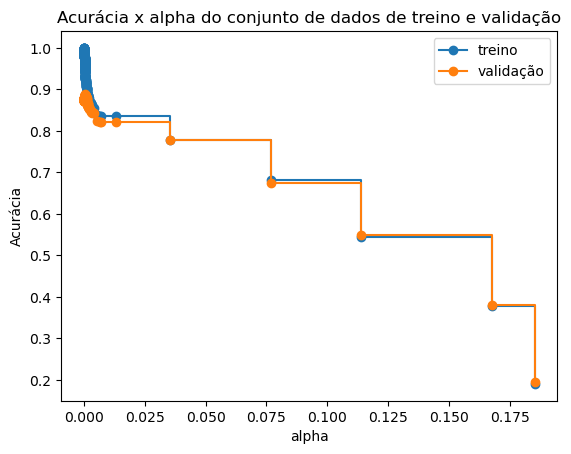

In [26]:
# Calculando a pontuação (acurácia) para cada classificador no conjunto de treinamento
train_scores = [clf.score(X_train, y_train) for clf in clfs] 
# Calculando a pontuação (acurácia) para cada classificador no conjunto de validação
valid_scores = [clf.score(X_valid, y_valid) for clf in clfs]

# Criando o gráfico
fig, ax = plt.subplots()
ax.set_xlabel("alpha")  # Definindo o rótulo do eixo x como "alpha"
ax.set_ylabel("Acurácia")  # Definindo o rótulo do eixo y como "Acurácia"
ax.set_title("Acurácia x alpha do conjunto de dados de treino e validação")  # Definindo o título do gráfico
# Plotando a acurácia do conjunto de treinamento em relação aos valores de alfa
ax.plot(ccp_alphas, train_scores, marker='o', label="treino", drawstyle="steps-post")
# Plotando a acurácia do conjunto de validação em relação aos valores de alfa
ax.plot(ccp_alphas, valid_scores, marker='o', label="validação", drawstyle="steps-post")
ax.legend()  # Adicionando a legenda ao gráfico
plt.show()  # Exibindo o gráfico


In [27]:
ind_melhor_arvore = len(valid_scores) - valid_scores[::-1].index(max(valid_scores)) - 1
melhor_arvore = clfs[ind_melhor_arvore]

print(f'Acurácia da melhor árvore na base de validação: {valid_scores[ind_melhor_arvore]*100:.2f}')

melhor_arvore

Acurácia da melhor árvore na base de validação: 88.79


DecisionTreeClassifier(ccp_alpha=0.00036223331471789936, random_state=2360873)

Obtemos uma ótima acurácia na validação, agora vamos ver com a base de teste.

### 5. Avaliação do modelo

Avalie a árvore encontrada no item anterior na base de testes.

Acurácia: 72.79


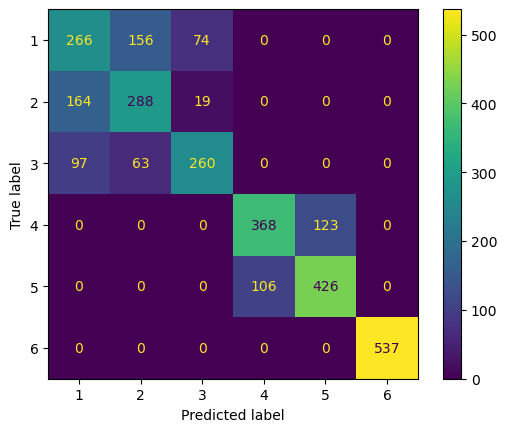

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calcula a acurácia do teste
acuracia_teste = melhor_arvore.score(X_test, y_test)
print(f'Acurácia: {acuracia_teste*100:.2f}')

# Calcula a matriz de confusão
matriz_de_confusao = confusion_matrix(y_test, melhor_arvore.predict(X_test))

# Plota a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_de_confusao, display_labels=melhor_arvore.classes_)
disp.plot()

Apesar de ser menor que a acurácia da validação, aqui também temos uma ótima acurácia, 72.7, ou seja, a cada 100x que fizer atividade, a pessoa que utilizar o modelo, precisará ajustar seu tipo de atividade apenas 27 ou 28 vezes. 